In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from skimage import transform
from normalization import CTNormalization
from utils import *

In [2]:
D = 256
W = 256
H = 150
normalization = CTNormalization(
    False,
    {
        'mean': 262.046,
        'std': 616.704,
        'percentile_00_5': 50,
        'percentile_99_5': 6000,
    }
)
pad_width = [(0, 0), (0, 0), ((W - H) // 2, (W - H) // 2)]

def image_process(image):
    image = np.pad(image, pad_width)
    image = normalization.run(image)
    return image

In [3]:
data_path = '/data_hdd/users/lisikuang/IXI/T1/valid/IXI014-HH-1236-T1.nii.gz'
data_obj = nib.load(data_path)
data_array = data_obj.get_fdata()
data_array = data_array.transpose(1, 0, 2)
print(data_array.shape)
data_array = image_process(data_array)
print(data_array.shape)
print(np.min(data_array), np.max(data_array))
data_odd = data_array[::2]
data_even = data_array[1::2]
print(data_odd.shape)
print(data_even.shape)

(256, 256, 150)
(256, 256, 256)
-0.34383756 6.838559
(128, 256, 256)
(128, 256, 256)


In [4]:
data_odd_sr = transform.resize(data_odd, (D, W, W))
data_even_sr = transform.resize(data_even, (D, W, W))
print(data_odd_sr.shape)
print(data_even_sr.shape)

(256, 256, 256)
(256, 256, 256)


psnr: 31.00557381816715 36.31655882738423
ssim: 0.9684816007020757 0.9894104469939583


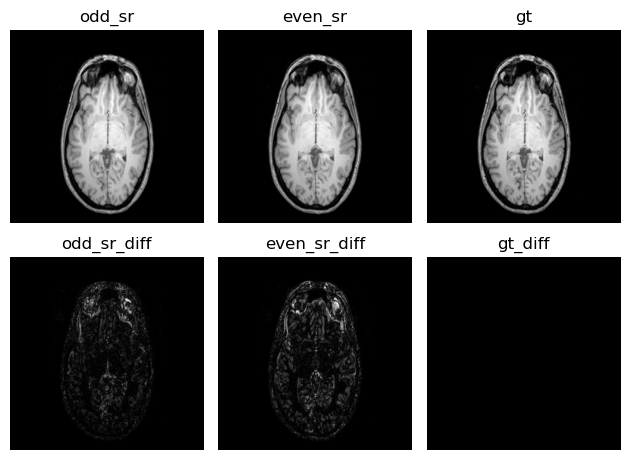

In [5]:
img_odd_sr = data_odd_sr[127]
img_even_sr = data_even_sr[127]
img_gt = data_array[127]

odd_psnr = compute_psnr(img_gt, img_odd_sr)
even_psnr = compute_psnr(img_gt, img_even_sr)
print('psnr:', odd_psnr, even_psnr)
odd_ssim = compare_ssim(img_gt, img_odd_sr, 11)
even_ssim = compare_ssim(img_gt, img_even_sr, 11)
print('ssim:', odd_ssim, even_ssim)

fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(img_odd_sr, cmap="gray")
axs[0, 0].set_title('odd_sr')
axs[0, 0].axis('off')
axs[0, 1].imshow(img_even_sr, cmap="gray")
axs[0, 1].set_title('even_sr')
axs[0, 1].axis('off')
axs[0, 2].imshow(img_gt, cmap="gray")
axs[0, 2].set_title('gt')
axs[0, 2].axis('off')
axs[1, 0].imshow(np.abs(img_odd_sr - img_gt), cmap="gray")
axs[1, 0].set_title('odd_sr_diff')
axs[1, 0].axis('off')
axs[1, 1].imshow(np.abs(img_even_sr - img_gt), cmap="gray")
axs[1, 1].set_title('even_sr_diff')
axs[1, 1].axis('off')
axs[1, 2].imshow(np.abs(img_gt - img_gt), cmap="gray")
axs[1, 2].set_title('gt_diff')
axs[1, 2].axis('off')

fig.tight_layout()

plt.show()